__6.1 用预处理进行参数选择__

In [8]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
svm =SVC()
svm.fit(X_train_scaled,y_train)
X_test_scaled = scaler.transform(X_test)
print(svm.score(X_test_scaled,y_test))

0.951048951049


In [9]:
from sklearn.model_selection import GridSearchCV
#只是为了便于说明，不要在实践中使用这些代码
param_grid = {'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(SVC(),param_grid=param_grid,cv=5)
grid.fit(X_train_scaled,y_train)

print(grid.best_score_)
print(grid.score(X_test_scaled,y_test))
print(grid.best_params_)

0.981220657277
0.972027972028
{'C': 1, 'gamma': 1}


__6.2 构建管道__

In [10]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler',MinMaxScaler()),('svm',SVC())])
pipe.fit(X_train,y_train)
print(pipe.score(X_test,y_test))


0.951048951049


__6.3在网格搜索中使用管道__

In [11]:
param_grid = {'svm__C':[0.001,0.01,0.1,1,10,100],'svm__gamma':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(pipe,param_grid = param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)


0.981220657277
0.972027972028
{'svm__C': 1, 'svm__gamma': 1}


__6.4通用的管道接口__

In [12]:
from sklearn.pipeline import make_pipeline
pipe_long = Pipeline([('scaler',MinMaxScaler()),('svm',SVC(C=100))])#标准写法
pipe_short = make_pipeline(MinMaxScaler(),SVC(C=100))#缩写写法

In [13]:
print(pipe_short.steps)#自动命名，可查看步骤的名称

[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pipe = make_pipeline(StandardScaler(),PCA(n_components=2),StandardScaler())
print(pipe.steps)

[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))]


In [16]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(),LogisticRegression())
param_grid = {'logisticregression__C':[0.01,0.1,1,10,100]}#自动命名为logisticregression
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=4)
grid = GridSearchCV(pipe,param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
print(grid.best_estimator_.named_steps['logisticregression'])#可以使用管道的named_steps属性来访问步骤属性

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


__6.5 网格搜索预处理步骤与模型参数__

In [21]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
boston = load_boston()
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)

from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(),Ridge())
param_grid = {'polynomialfeatures__degree':[1,2,3],'ridge__alpha':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(pipe,param_grid,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

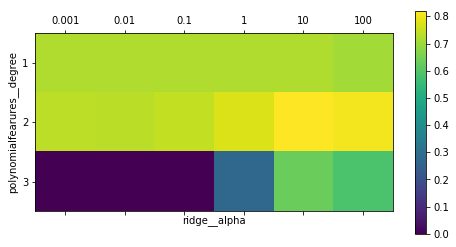

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3,-1),vmin=0,cmap='viridis')
plt.xlabel('ridge__alpha')
plt.ylabel('polynomialfearures__degree')
plt.xticks(range(len(param_grid['ridge__alpha'])),param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),param_grid['polynomialfeatures__degree'])
plt.colorbar()

__6.6 网格搜索选择使用哪个模型__

In [29]:
pipe = Pipeline([('preprocessing',StandardScaler()),('classifier',SVC())])
from sklearn.ensemble import RandomForestClassifier

param_grid = [{'classifier':[SVC()],'preprocessing':[StandardScaler(),None],'classifier__gamma':[0.001,0.01,0.1,1,10,100],'classifier__C':[0.001,0.01,0.1,1,10,100]},
              {'classifier':[RandomForestClassifier(n_estimators=100)],'preprocessing':[None],'classifier__max_features':[1,2,3]}]
    

In [30]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
grid = GridSearchCV(pipe,param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)
print(grid.score(X_test,y_test))

{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}
0.985915492958
0.979020979021
